In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
# =========================
# SETUP & DATA LOADING
# =========================
df_all = pd.read_csv("Result_Data/1.Default_para_All_features.csv")
df_topk = pd.read_csv("Result_Data/2.Default_para_top_k_features.csv")
df_tuned = pd.read_csv("Result_Data/3.hyperparameters_top_k_features.csv")

df_all.head()

,model,accuracy,f1,auc,pr_auc,loyalty_precision,loyalty_recall,caught_loyal,missed_loyal
0,Logistic Regression,0.590223,0.731680,0.603106,0.991028,0.015543,0.529851,71,63
1,Linear SVC,0.552211,0.701034,0.581361,0.990621,0.013446,0.500000,67,67
2,Random Forest,0.674515,0.795196,0.572766,0.989668,0.014206,0.380597,51,83
3,GBT,0.668045,0.790537,0.561163,0.989318,0.014722,0.402985,54,80
4,Naive Bayes,0.490249,0.647169,0.530949,0.988361,0.013528,0.574627,77,57


In [5]:
df_topk.head()

,model,accuracy,f1,auc,pr_auc,loyalty_precision,loyalty_recall,caught_loyal,missed_loyal
0,Logistic Regression Top-4,0.663731,0.787251,0.627279,0.992633,0.017647,0.492537,66,68
1,Linear SVC Top-4,0.937994,0.956922,0.629204,0.992489,0.031987,0.141791,19,115
2,Random Forest Top-4,0.743979,0.842508,0.629268,0.992376,0.021164,0.447761,60,74
3,Linear SVC Top-3,0.937994,0.956922,0.627644,0.992104,0.031987,0.141791,19,115
4,Logistic Regression Top-3,0.681165,0.799677,0.627857,0.992093,0.018884,0.500000,67,67


In [6]:
df_tuned.head()

,model,accuracy,f1,auc,pr_auc,loyalty_precision,loyalty_recall,caught_loyal,missed_loyal,best_params
0,Logistic Regression (Tuned) Top-4,0.663731,0.787251,0.627279,0.992633,0.017647,0.492537,66,68,"{'elasticNetParam': 0.0, 'maxIter': 100, 'regP..."
1,Linear SVC (Tuned) Top-4,0.937994,0.956922,0.629204,0.992489,0.031987,0.141791,19,115,"{'maxIter': 100, 'regParam': 0.0, 'threshold':..."
2,Random Forest (Tuned) Top-4,0.743979,0.842508,0.629268,0.992376,0.021164,0.447761,60,74,"{'featureSubsetStrategy': 'auto', 'maxDepth': ..."
3,Linear SVC (Tuned) Top-3,0.937994,0.956922,0.627644,0.992104,0.031987,0.141791,19,115,"{'maxIter': 100, 'regParam': 0.0, 'threshold':..."
4,Logistic Regression (Tuned) Top-3,0.681165,0.799677,0.627857,0.992093,0.018884,0.500000,67,67,"{'elasticNetParam': 0.0, 'maxIter': 100, 'regP..."


In [7]:
# =============================
# DATA CLEANING & PREPARATION
# =============================
df_all['Stage'] = '1. Baseline (All)'
df_topk['Stage'] = '2. Feature Selection'
df_tuned['Stage'] = '3. Hyperparameter Tuning'

In [8]:
df_all.head()

,model,accuracy,f1,auc,pr_auc,loyalty_precision,loyalty_recall,caught_loyal,missed_loyal,Stage
0,Logistic Regression,0.590223,0.731680,0.603106,0.991028,0.015543,0.529851,71,63,1. Baseline (All)
1,Linear SVC,0.552211,0.701034,0.581361,0.990621,0.013446,0.500000,67,67,1. Baseline (All)
2,Random Forest,0.674515,0.795196,0.572766,0.989668,0.014206,0.380597,51,83,1. Baseline (All)
3,GBT,0.668045,0.790537,0.561163,0.989318,0.014722,0.402985,54,80,1. Baseline (All)
4,Naive Bayes,0.490249,0.647169,0.530949,0.988361,0.013528,0.574627,77,57,1. Baseline (All)


In [9]:
all_results = pd.concat([df_all, df_topk, df_tuned], ignore_index=True)
all_results.head()

,model,accuracy,f1,auc,pr_auc,loyalty_precision,loyalty_recall,caught_loyal,missed_loyal,Stage,best_params
0,Logistic Regression,0.590223,0.731680,0.603106,0.991028,0.015543,0.529851,71,63,1. Baseline (All),NaN
1,Linear SVC,0.552211,0.701034,0.581361,0.990621,0.013446,0.500000,67,67,1. Baseline (All),NaN
2,Random Forest,0.674515,0.795196,0.572766,0.989668,0.014206,0.380597,51,83,1. Baseline (All),NaN
3,GBT,0.668045,0.790537,0.561163,0.989318,0.014722,0.402985,54,80,1. Baseline (All),NaN
4,Naive Bayes,0.490249,0.647169,0.530949,0.988361,0.013528,0.574627,77,57,1. Baseline (All),NaN


In [10]:

def clean_model_name(name):
    name = re.sub(r'\(Tuned\)', '', name)
    name = re.sub(r'Top-\d+', '', name)
    name = re.sub(r'\s+\d+$', '', name)
    return name.strip()

all_results['Model_Type'] = all_results['model'].apply(clean_model_name)
all_results.head()

,model,accuracy,f1,auc,pr_auc,loyalty_precision,loyalty_recall,caught_loyal,missed_loyal,Stage,best_params,Model_Type
0,Logistic Regression,0.590223,0.731680,0.603106,0.991028,0.015543,0.529851,71,63,1. Baseline (All),NaN,Logistic Regression
1,Linear SVC,0.552211,0.701034,0.581361,0.990621,0.013446,0.500000,67,67,1. Baseline (All),NaN,Linear SVC
2,Random Forest,0.674515,0.795196,0.572766,0.989668,0.014206,0.380597,51,83,1. Baseline (All),NaN,Random Forest
3,GBT,0.668045,0.790537,0.561163,0.989318,0.014722,0.402985,54,80,1. Baseline (All),NaN,GBT
4,Naive Bayes,0.490249,0.647169,0.530949,0.988361,0.013528,0.574627,77,57,1. Baseline (All),NaN,Naive Bayes


In [11]:
def extract_k(name):
    match = re.search(r'Top-(\d+)', name)
    return int(match.group(1)) if match else 41

all_results['k'] = all_results['model'].apply(extract_k)
all_results.head()

,model,accuracy,f1,auc,pr_auc,loyalty_precision,loyalty_recall,caught_loyal,missed_loyal,Stage,best_params,Model_Type,k
0,Logistic Regression,0.590223,0.731680,0.603106,0.991028,0.015543,0.529851,71,63,1. Baseline (All),NaN,Logistic Regression,41
1,Linear SVC,0.552211,0.701034,0.581361,0.990621,0.013446,0.500000,67,67,1. Baseline (All),NaN,Linear SVC,41
2,Random Forest,0.674515,0.795196,0.572766,0.989668,0.014206,0.380597,51,83,1. Baseline (All),NaN,Random Forest,41
3,GBT,0.668045,0.790537,0.561163,0.989318,0.014722,0.402985,54,80,1. Baseline (All),NaN,GBT,41
4,Naive Bayes,0.490249,0.647169,0.530949,0.988361,0.013528,0.574627,77,57,1. Baseline (All),NaN,Naive Bayes,41


In [12]:
all_results.shape

(93, 13)

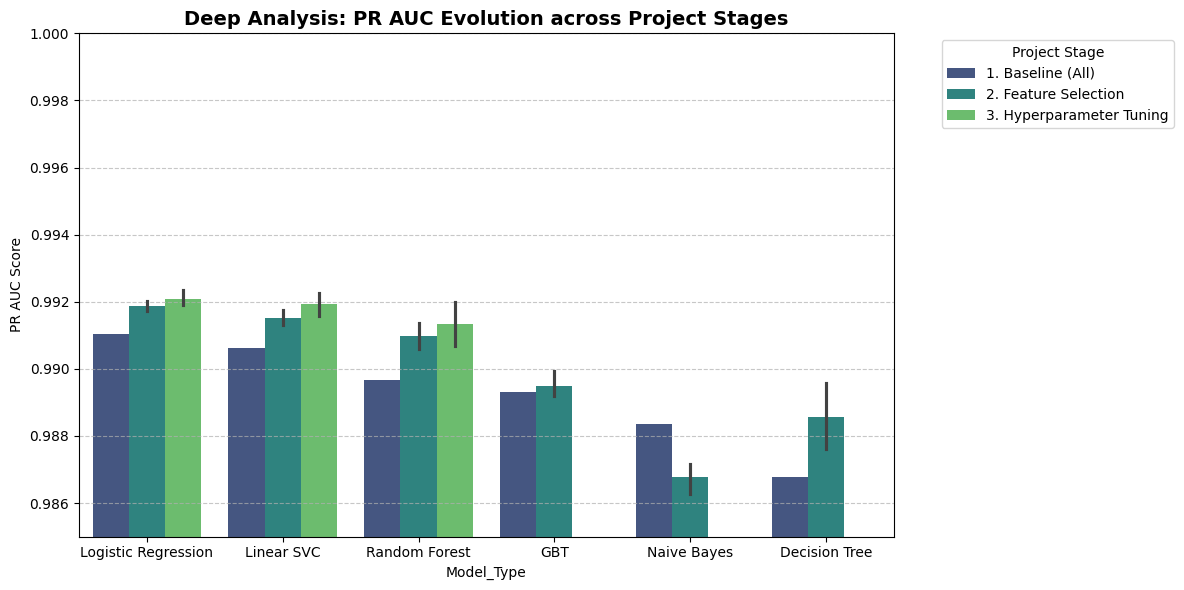

In [ ]:
# ===================================================
# PERFORMANCE EVOLUTION (PR AUC) VISUALIZATION
# ====================================================
plt.figure(figsize=(12, 6))
sns.barplot(data=all_results, x='Model_Type', y='pr_auc', hue='Stage', palette='viridis')
plt.title('Deep Analysis: PR AUC Evolution across Project Stages', fontsize=14, fontweight='bold')
plt.ylabel('PR AUC Score')
plt.ylim(0.985, 1.0) # Zooming in to see the fine improvements
plt.legend(title='Project Stage', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

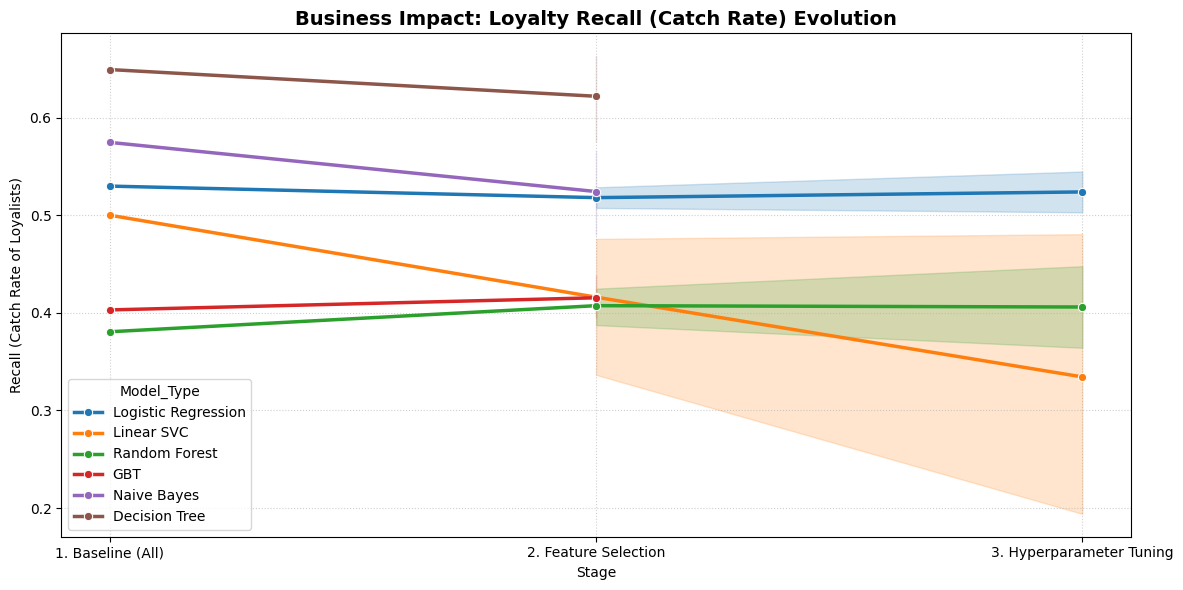

In [ ]:
# ================================================
# BUSINESS IMPACT (LOYALTY RECALL) VISUALIZATION
# ================================================
plt.figure(figsize=(12, 6))
sns.lineplot(data=all_results, x='Stage', y='loyalty_recall', hue='Model_Type', marker='o', linewidth=2.5)
plt.title('Business Impact: Loyalty Recall (Catch Rate) Evolution', fontsize=14, fontweight='bold')
plt.ylabel('Recall (Catch Rate of Loyalists)')
plt.grid(True, linestyle=':', alpha=0.6)
plt.tight_layout()
plt.show()

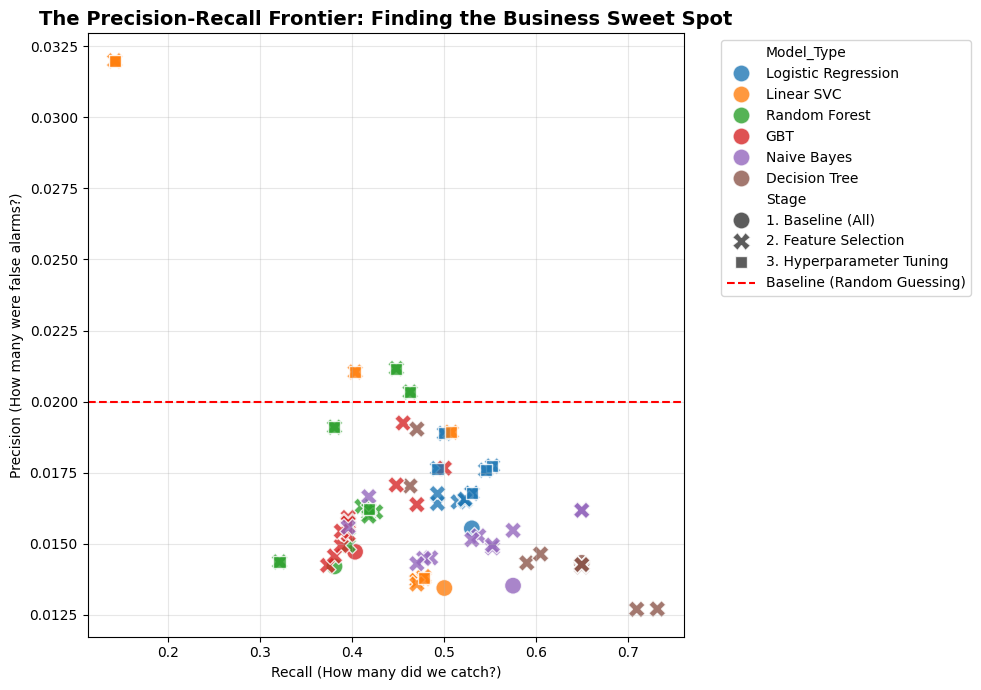

In [ ]:
# ===========================================
# THE PRECISION-RECALL FRONTIER VISUALIZATION
# ==============================================
plt.figure(figsize=(10, 7))
scatter = sns.scatterplot(data=all_results, x='loyalty_recall', y='loyalty_precision', 
                         hue='Model_Type', style='Stage', s=150, alpha=0.8)
plt.title('The Precision-Recall Frontier: Finding the Business Sweet Spot', fontsize=14, fontweight='bold')
plt.xlabel('Recall (How many did we catch?)')
plt.ylabel('Precision (How many were false alarms?)')
plt.axhline(0.02, color='red', linestyle='--', label='Baseline (Random Guessing)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

In [19]:
# ==========================================
# FINAL SUMMARY & WINNER IDENTIFICATION
# ==========================================
winner = all_results.sort_values(by=['pr_auc', 'loyalty_recall'], ascending=False).iloc[0]

print("\n" + "="*60)
print("             FINAL PROJECT ANALYSIS SUMMARY")
print("="*60)
print(f"{'Metric':<25} | {'Winning Result'}")
print("-" * 60)
print(f"{'Best Performing Model:':<25} | {winner['model']}")
print(f"{'Optimal Project Stage:':<25} | {winner['Stage']}")
print(f"{'Peak PR AUC:':<25} | {winner['pr_auc']:.5f}")
print(f"{'Loyalty Recall:':<25} | {winner['loyalty_recall']:.2%}")
print(f"{'Overall Accuracy:':<25} | {winner['accuracy']:.2%}")
print("-" * 60)
print(f"BUSINESS OUTCOME: Caught {int(winner['caught_loyal'])} out of {int(winner['caught_loyal'] + winner['missed_loyal'])} loyal customers.")
print("="*60)

if 'best_params' in winner and pd.notnull(winner['best_params']):
    print(f"\nOPTIMAL PARAMETERS FOR DEPLOYMENT:\n{winner['best_params']}")


             FINAL PROJECT ANALYSIS SUMMARY
Metric                    | Winning Result
------------------------------------------------------------
Best Performing Model:    | Logistic Regression Top-4
Optimal Project Stage:    | 2. Feature Selection
Peak PR AUC:              | 0.99263
Loyalty Recall:           | 49.25%
Overall Accuracy:         | 66.37%
------------------------------------------------------------
BUSINESS OUTCOME: Caught 66 out of 134 loyal customers.
